# **Análisis de datos médicos con aprendizaje no supervisado**

Equipo:
*   Alejandra Velasco Zárate A01635453
*   Laura Merarí Valdivia Frausto A01641790
*   Francisco Javier Ochoa Chávez A01641644

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
# clustering methods
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage

# Metrics for evaluating clustering results
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Distance metrics
from sklearn.metrics import pairwise_distances

####### Helper funtion for plotting #######
def plot_data(points, labels, title):
    fig = plt.figure()
    if points.shape[1] > 2:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)

    plt.show()

# **Búsqueda de una base de datos médicos o experimentales**




Busca un conjunto de datos con la cual puedas llevar a cabo tu proyecto. Para ello, se te sugiere cualquiera de las dos alternativas:

En el sitio Kaggle to an external site. selecciona una base de datos relacionada a la salud a la cuál se le pueda aplicar modelos de agrupamiento.
Algún conjunto de datos que obtivista en tu proyecto anterior de este curso (por ejemplo, el de tareas cognitivas).

Se utilizaran los datos obtenidos en el proyecto pasado, del experimento cognitivo en el sujeto identificado como Laura, ya que consideramos que son buenos para agrupar ya que sabemos que la naturaleza de los datos, las clases son actividades específicas que se pueden agrupar mediante el análisis de las señales cerebrales y pueden compartir características en común.

In [ ]:
df_1 = pd.read_csv("/content/Fat_Supply_Quantity_Data.csv")
df_2 = pd.read_csv("/content/Protein_Supply_Quantity_Data.csv")

df_1= df_1.drop(df_1.columns[-3:], axis=1)
df_1.drop("Undernourished",axis=1, inplace=True)

df_2= df_2.drop(df_2.columns[-3:], axis=1)
df_2.drop("Undernourished",axis=1, inplace=True)

merged_df = pd.merge(df_1, df_2, on='Country', how='inner')

merged_df.drop("Country",axis=1, inplace=True)

merged_df.dropna(inplace=True)
merged_df.shape


(163, 54)

# **Búsqueda de patrones con modelos de agrupamiento**

# K-means

1. Utiliza el algoritmo k-medias para buscar posibles grupos de observaciones en la base de datos que seleccionaron. ¿Qué preguntas consideran importantes que pueden responder con agrupamiento para esa base de datos? ¿Qué han descubierto al analizar los grupos?

----- K-means -----
Labels:  [1 0 5 2 7 0 0 7 0 3 7 2 7 3 0 3 2 3 5 1 0 0 2 3 2 2 0 2 1 0 7 3 2 3 2 0 3
 7 0 0 1 7 3 3 8 3 0 1 2 3 7 0 7 2 0 0 2 5 7 3 2 5 5 2 1 0 7 1 6 5 3 0 0 0
 7 3 5 3 1 4 3 1 8 0 5 1 2 0 0 1 2 3 7 1 0 1 1 3 7 0 5 2 1 8 0 7 1 2 2 5 7
 3 1 0 3 3 7 0 0 0 0 3 9 7 7 7 7 6 3 2 0 2 0 0 2 3 0 6 1 3 0 0 1 6 1 2 7 5
 5 2 3 5 0 2 0 3 1 6 3 7 1 2 1]
Centers:  [[-1.10782559e-01  9.07927883e-01  1.07668712e+00 -1.14141418e-01
  -7.17316609e-01  4.47798843e-01 -2.79569064e-01 -2.15054051e-01
   3.07342440e-01 -3.84226435e-01  6.90412022e-01 -4.10597709e-01
  -5.09934877e-01 -5.29002231e-01 -4.13797142e-01 -4.55062374e-01
   6.13101282e-01 -1.46986410e-01 -1.14270275e-01  1.96315047e-01
  -9.08029843e-01 -3.80944646e-01 -1.35424125e-01  6.97160971e-01
   1.44074543e+00  1.33724488e+00  1.08986002e+00  6.99250522e-01
   9.33932920e-01  9.94054105e-01 -9.60757507e-02 -7.10368479e-01
   7.51495492e-01 -2.33854531e-01 -2.51463636e-01  7.05555659e-01
   1.04178869e+00 -1.70524316e-01 -

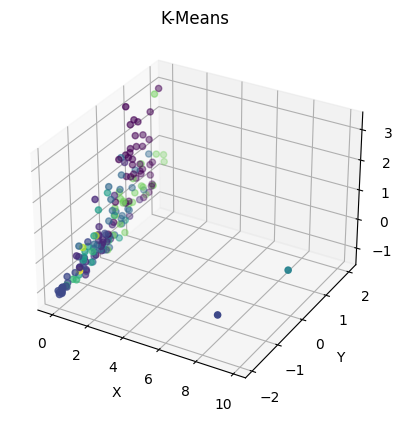

In [ ]:
import warnings
warnings.filterwarnings("ignore")

####### K-means #######
print('----- K-means -----')
df_modelo = StandardScaler().fit_transform(merged_df)
kmeans = KMeans(n_clusters=10).fit(df_modelo)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_

print('Labels: ', clustering_labels)
print('Centers: ', centers)

plot_data(df_modelo, clustering_labels, 'K-Means')

In [ ]:
merged_df["etiquetas"]= clustering_labels
print(clustering_labels)

promedio_por_grupo = merged_df.groupby('etiquetas')['Animal Products_x','Vegetal Products_x','Obesity_x','Alcoholic Beverages_y','Fruits - Excluding Wine_y','Confirmed_y', 'Deaths_y',
       'Recovered_y'].mean()

promedio_por_grupo

[1 0 5 2 7 0 0 7 0 3 7 2 7 3 0 3 2 3 5 1 0 0 2 3 2 2 0 2 1 0 7 3 2 3 2 0 3
 7 0 0 1 7 3 3 8 3 0 1 2 3 7 0 7 2 0 0 2 5 7 3 2 5 5 2 1 0 7 1 6 5 3 0 0 0
 7 3 5 3 1 4 3 1 8 0 5 1 2 0 0 1 2 3 7 1 0 1 1 3 7 0 5 2 1 8 0 7 1 2 2 5 7
 3 1 0 3 3 7 0 0 0 0 3 9 7 7 7 7 6 3 2 0 2 0 0 2 3 0 6 1 3 0 0 1 6 1 2 7 5
 5 2 3 5 0 2 0 3 1 6 3 7 1 2 1]


,Animal Products_x,Vegetal Products_x,Obesity_x,Alcoholic Beverages_y,Fruits - Excluding Wine_y,Confirmed_y,Deaths_y,Recovered_y
etiquetas,,,,,,,,
0,27.945238,22.054441,25.248718,0.439579,0.687995,5.427486,0.104628,3.558411
1,17.652261,32.348891,10.991304,0.134735,0.479143,0.452775,0.009141,0.357459
2,9.929673,40.069812,7.719231,0.323054,0.840496,0.124381,0.002212,0.099511
3,21.309779,28.690655,23.434483,0.209117,0.951162,1.934106,0.042573,1.723708
4,20.048300,29.956300,4.900000,1.035900,0.474100,0.156227,0.002841,0.136855
5,16.547015,33.453592,25.376923,0.124908,0.946700,2.323950,0.050801,1.933671
6,12.225020,37.771960,11.440000,0.097640,1.616200,0.282695,0.004369,0.232298
7,27.893543,22.107478,21.491304,0.224043,1.003330,0.748220,0.007419,0.480647
8,16.604600,33.401600,13.133333,0.033333,1.222133,0.358174,0.005437,0.341465


Número óptimo de cluster en KMeans, método de Silhouette

La puntuación de silhouette para 2 clusters: 0.192
La puntuación de silhouette para 3 clusters: 0.122
La puntuación de silhouette para 4 clusters: 0.094
La puntuación de silhouette para 5 clusters: 0.104
La puntuación de silhouette para 6 clusters: 0.099
La puntuación de silhouette para 7 clusters: 0.068
La puntuación de silhouette para 8 clusters: 0.083
La puntuación de silhouette para 9 clusters: 0.069
La puntuación de silhouette para 10 clusters: 0.104


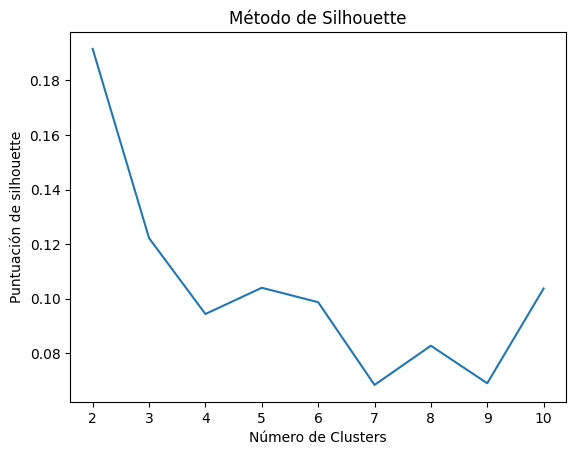

In [ ]:
silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(df_modelo)
  labels = kmeans.labels_
  silhouette_avg = silhouette_score(df_modelo, labels)
  silhouette_scores.append(silhouette_avg)
  print("La puntuación de silhouette para", k, "clusters:", round(silhouette_avg, 3))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de silhouette')
plt.title('Método de Silhouette')
plt.show()

Número óptimo de cluster en KMeans, método de Elbow


Para k = 1, el sse es: 8802.0

Para k = 2, el sse es: 7101.73

Para k = 3, el sse es: 6504.79

Para k = 4, el sse es: 6174.83

Para k = 5, el sse es: 5716.54

Para k = 6, el sse es: 5477.42

Para k = 7, el sse es: 5317.27

Para k = 8, el sse es: 5099.07

Para k = 9, el sse es: 4943.42

Para k = 10, el sse es: 4689.41


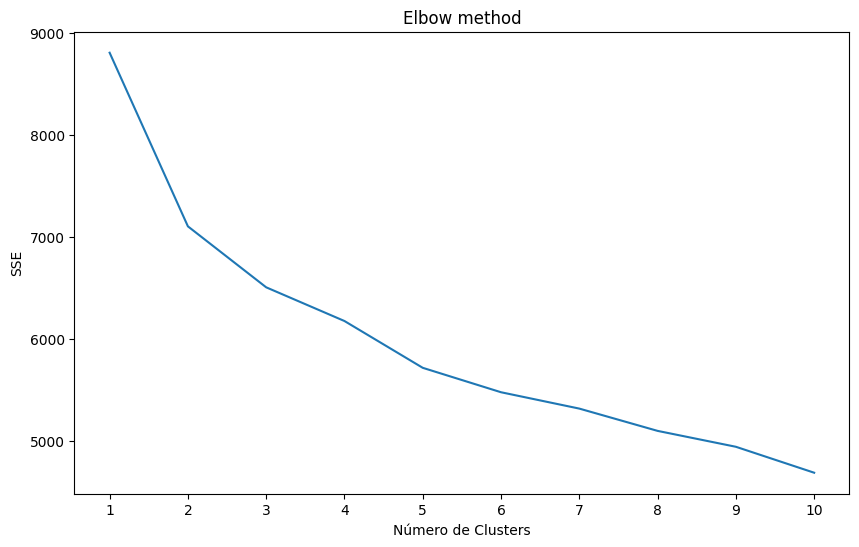

In [ ]:
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
  kmeans.fit(df_modelo)
  sse.append(kmeans.inertia_)
  print(f"\nPara k = {k}, el sse es: {round(sse[-1],2)}")


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Elbow method')
plt.show()

Después de observar los dos métodos de Silhouette y Elbow, para el método de agrupamiento KMeans el óptimo número de cluster es 2, porque tiene el Score más alto en Silhouette y un error pequeño en Elbow. Sin embargo, estaremos analizando con 2 y 3 cluster para poder analizar si se siguen los mismos patrones en ambos casos.

KMEANS CLUSTER ÓPTIMO

cluster = 2

----- K-means -----
Labels:  [0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0
 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1
 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0]
Centers:  [[ 0.15476975 -0.81459056 -0.60820948  0.0686187   0.73317968 -0.58675198
   0.07860242  0.0743506  -0.4883398  -0.21166015 -0.59217007  0.24115464
   0.49193357  0.49942707  0.16040455  0.49929352 -0.55445947  0.23503759
   0.12285858 -0.35867406  0.81463286  0.33440724 -0.09003254 -0.83394402
  -0.73369526 -0.69231121 -0.6276102  -0.16367311 -0.9220684  -0.42684265
   0.08879403  0.73584332 -0.72466615  0.01415936  0.01569422 -0.78521263
  -0.77306751 -0.02360329  0.53360111  0.53607609  0.11405471  0.37688944
  -0.38960742  0.23717563 -0.08459347 -0.34108617  0.92205182 -0.49375092
  -0.21322502 -0.33083434 -0.83394402

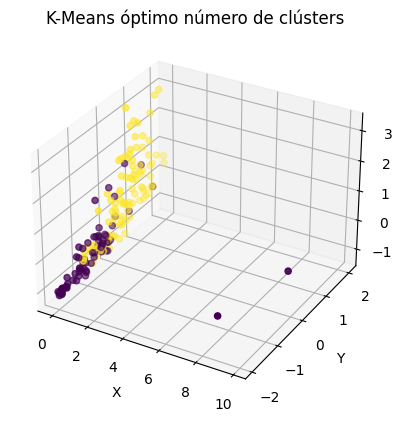

In [ ]:
import warnings
warnings.filterwarnings("ignore")

####### K-means #######
print('----- K-means -----')
kmeans = KMeans(n_clusters=2).fit(df_modelo)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_

print('Labels: ', clustering_labels)
print('Centers: ', centers)

plot_data(df_modelo, clustering_labels, 'K-Means óptimo número de clústers')

In [ ]:
merged_df["etiquetas"]= clustering_labels

print(clustering_labels)
promedio_por_grupo = merged_df.groupby('etiquetas')['Animal Products_x','Vegetal Products_x','Obesity_x','Alcoholic Beverages_y','Fruits - Excluding Wine_y','Confirmed_y', 'Deaths_y',
       'Recovered_y'].mean()

promedio_por_grupo

[0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0
 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1
 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0]


,Animal Products_x,Vegetal Products_x,Obesity_x,Alcoholic Beverages_y,Fruits - Excluding Wine_y,Confirmed_y,Deaths_y,Recovered_y
etiquetas,,,,,,,,
0,14.160529,35.839766,10.869118,0.227625,0.861476,0.306410,0.005951,0.253563
1,25.345558,24.654594,24.307368,0.296603,0.843991,3.271196,0.063705,2.325689


3 Clusters

----- K-means -----
Labels:  [1 2 0 1 0 2 2 0 2 0 0 1 0 0 2 0 1 0 2 0 2 2 1 0 1 1 2 1 1 2 0 2 1 2 1 2 0
 0 2 2 1 0 0 0 1 0 2 1 1 0 0 2 0 1 2 2 1 0 0 1 1 1 0 1 1 2 0 1 1 0 1 2 2 2
 0 0 0 0 1 0 0 0 1 2 0 1 1 2 2 1 1 0 0 1 2 1 0 0 0 2 1 1 1 1 2 0 1 1 1 2 0
 0 0 2 0 0 0 2 2 2 2 2 1 0 0 0 0 1 0 1 2 1 2 2 1 0 2 1 1 0 2 2 1 0 1 1 0 0
 0 1 2 0 2 1 2 0 0 1 0 0 1 1 1]
Centers:  [[ 0.05082114  0.29832043 -0.05294947  0.18594005 -0.33825799  0.2931038
   0.1638111   0.02540852  0.41501687  0.48919496  0.08755369  0.10909443
  -0.16709172 -0.22515513  0.05833631 -0.2663329   0.09787243 -0.11324263
  -0.06652733  0.20868127 -0.29829867 -0.11127191  0.14114114  0.34901276
  -0.3135712  -0.33263402 -0.20532015 -0.2474132   0.38893473 -0.12467332
   0.16551863 -0.30666385  0.2327888   0.24453948  0.1215791   0.40300051
   0.06467837  0.20235453 -0.14267723 -0.23198359  0.08749023 -0.30303325
   0.02928065 -0.09367067 -0.08489158  0.1349826  -0.38894814  0.12706679
   0.16445522  0.57308003  0.34901276 

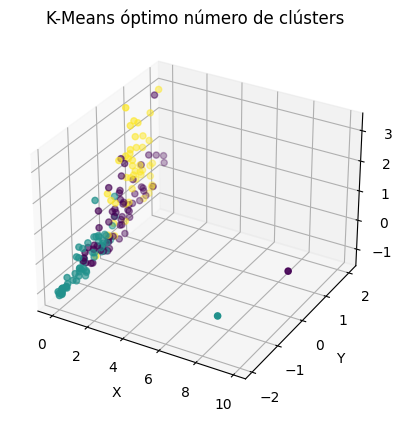

In [ ]:
import warnings
warnings.filterwarnings("ignore")

####### K-means #######
print('----- K-means -----')
kmeans = KMeans(n_clusters=3).fit(df_modelo)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_

print('Labels: ', clustering_labels)
print('Centers: ', centers)

plot_data(df_modelo, clustering_labels, 'K-Means óptimo número de clústers')

In [ ]:
merged_df["etiquetas"]= clustering_labels

print(clustering_labels)

promedio_por_grupo = merged_df.groupby('etiquetas')['Animal Products_x','Vegetal Products_x','Obesity_x','Alcoholic Beverages_y','Fruits - Excluding Wine_y','Confirmed_y', 'Deaths_y',
       'Recovered_y'].mean()

promedio_por_grupo

[1 2 0 1 0 2 2 0 2 0 0 1 0 0 2 0 1 0 2 0 2 2 1 0 1 1 2 1 1 2 0 2 1 2 1 2 0
 0 2 2 1 0 0 0 1 0 2 1 1 0 0 2 0 1 2 2 1 0 0 1 1 1 0 1 1 2 0 1 1 0 1 2 2 2
 0 0 0 0 1 0 0 0 1 2 0 1 1 2 2 1 1 0 0 1 2 1 0 0 0 2 1 1 1 1 2 0 1 1 1 2 0
 0 0 2 0 0 0 2 2 2 2 2 1 0 0 0 0 1 0 1 2 1 2 2 1 0 2 1 1 0 2 2 1 0 1 1 0 0
 0 1 2 0 2 1 2 0 0 1 0 0 1 1 1]


,Animal Products_x,Vegetal Products_x,Obesity_x,Alcoholic Beverages_y,Fruits - Excluding Wine_y,Confirmed_y,Deaths_y,Recovered_y
etiquetas,,,,,,,,
0,23.066765,26.933715,21.979032,0.207056,0.930234,1.295854,0.023438,1.066156
1,12.672261,37.327827,9.964286,0.212386,0.870427,0.309665,0.006463,0.253600
2,27.354622,22.645376,25.057778,0.420549,0.718691,5.198118,0.103144,3.508433


**¿Qué preguntas consideran importantes que pueden responder con agrupamiento para esa base de datos?**
**¿Qué han descubierto al analizar los grupos?**

Al analizar el primer agrupamiento, cuando se utilizaron 10 clusters, observamos que se podía observar una pequeña diferencia entre los promedios de las variables Deaths, Recovered y Confirmed,(las cuales son las variables que más nos interesan en este modelo), no había una tendencia clara de que estas variables influyeran en el clusters formados. Sin embargo una vez que analizamos el número de cluster óptimos, el cual nos arrojó que eran alrededor de 2, hicimos los modelos con 2 y 3 clusters, en los cuales ya se nota una diferencia muy clara en el agrupamiento, donde podemos observar que agrupó los países tomando en cuenta indicadores de cómo le fue en la pandemia tales como número de muertos, numero de contagiados y numere de recuperados;  y al mismo tiempo,los países se agruparon por la calidad de su alimentación, los países que consumen más vegetales, más frutas; menos alcohol, alimentos de origen animal y que tenían menos obesidad, fueron los países que tenían los mejores números en la pandemia, demostrando así que la alimentación jugó un papel importante a la hora de determinar los afectados por la pandemia del Covid-19.

Analizando las labels y verificando los paises que estan en cada grupo, observamos que la mayoría de países africanos y asiáticos, que tienen buena alimentación en general, fueron agrupados en el cluster con buenos indicadores en la pandemia, por otro lado, países que tienen mala alimentación, como Estados Unidos, Canadá, México, España, Italia, Francia; fueron agrupados en el cluster de países con mal manejo de pandemia.



2. Utiliza otros dos algoritmos de agrupamiento distintos a k-medias y agrupamiento jerárquico, y repite el paso anterior.

# Mezclas Gaussianas

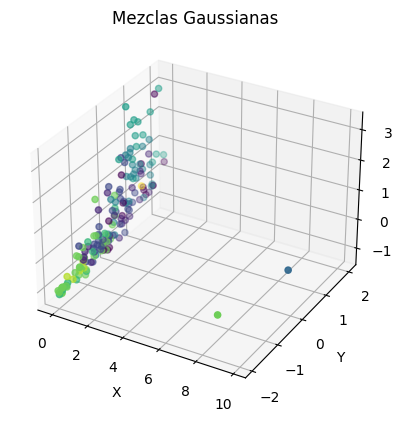

In [ ]:
# Crear el objeto GaussianMixture
gmm = GaussianMixture(n_components=10)

# Ajustar el modelo a los datos
gmm.fit(df_modelo)

# Obtener las etiquetas de los clusters asignados
labels = gmm.predict(df_modelo)

# Obtener las probabilidades de pertenencia a cada cluster
probs = gmm.predict_proba(df_modelo)

plot_data(df_modelo, labels, 'Mezclas Gaussianas')

In [ ]:
merged_df["etiquetas"]= labels

print(labels)
promedio_por_grupo = merged_df.groupby('etiquetas')['Animal Products_x','Vegetal Products_x','Obesity_x','Alcoholic Beverages_y','Fruits - Excluding Wine_y','Confirmed_y', 'Deaths_y',
       'Recovered_y'].mean()

promedio_por_grupo

[7 1 1 7 2 4 1 0 5 1 0 7 2 0 5 2 6 0 1 2 4 4 7 2 7 7 5 6 6 4 0 4 6 4 6 4 2
 2 4 5 7 2 2 2 7 2 5 7 7 2 5 4 0 7 4 5 6 1 2 2 7 7 1 8 2 5 5 7 8 1 2 5 4 4
 2 2 1 1 7 3 1 1 7 5 1 7 7 4 4 7 7 2 9 7 1 2 2 0 0 4 7 7 2 7 4 0 2 7 7 1 5
 1 2 4 0 0 0 5 4 4 4 4 8 2 0 2 6 6 2 7 4 7 5 4 6 0 4 6 7 2 5 4 7 2 7 7 2 1
 1 8 1 1 4 8 4 2 1 6 2 0 7 7 7]


,Animal Products_x,Vegetal Products_x,Obesity_x,Alcoholic Beverages_y,Fruits - Excluding Wine_y,Confirmed_y,Deaths_y,Recovered_y
etiquetas,,,,,,,,
0,27.177560,22.822387,20.053333,0.288953,0.786053,1.231303,0.037162,1.045015
1,21.951024,28.049724,25.152381,0.139043,0.920081,2.648793,0.048952,2.266664
2,20.291122,29.710066,20.615625,0.168734,0.944981,0.899510,0.015869,0.688727
3,20.048300,29.956300,4.900000,1.035900,0.474100,0.156227,0.002841,0.136855
4,26.701781,23.297700,25.340741,0.384952,0.750741,5.973449,0.111939,4.030382
5,29.743093,20.257333,24.853333,0.541893,0.590073,3.515343,0.073038,2.113173
6,12.301327,37.697355,13.809091,0.231600,1.326000,0.184354,0.002659,0.148200
7,12.808580,37.191806,8.414286,0.200440,0.646843,0.248733,0.005350,0.209777
8,10.459140,39.539020,8.680000,0.368880,1.990120,0.147852,0.003225,0.110121


Método para ver cluters óptimos para Mezclas Gaussianas

In [ ]:

# Rango de números de componentes
n_components_range = range(2, 11)

# Lista para almacenar los valores del AIC
aic_values = []

# Calcular el AIC para cada número de componentes
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(df_modelo)
    aic = gmm.aic(df_modelo)
    aic_values.append(aic)

# Encontrar el número óptimo de componentes con el AIC más bajo
optimal_n_components = n_components_range[np.argmin(aic_values)]

# Imprimir los valores del AIC y el número óptimo de componentes
for n_components, aic in zip(n_components_range, aic_values):
    print(f"Número de componentes: {n_components}, AIC: {aic}")

print(f"Número óptimo de componentes: {optimal_n_components}")

Número de componentes: 2, AIC: -4833.825156292194
Número de componentes: 3, AIC: -3612.7910062755036
Número de componentes: 4, AIC: -9533.884886479107
Número de componentes: 5, AIC: -15068.198621407239
Número de componentes: 6, AIC: -12659.149167393254
Número de componentes: 7, AIC: -21069.43817243242
Número de componentes: 8, AIC: -16386.798988738854
Número de componentes: 9, AIC: -29896.178374032104
Número de componentes: 10, AIC: -24715.991803059806
Número óptimo de componentes: 9


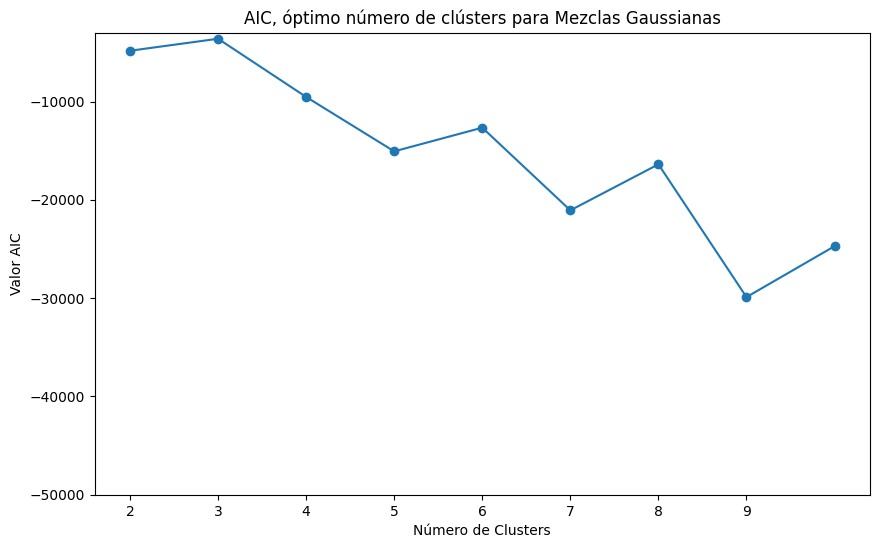

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), aic_values,  marker='o')
plt.xticks(range(2, 10))
plt.xlabel('Número de Clusters')
plt.ylabel('Valor AIC')
plt.ylim(bottom=-0.5e5, top=-0.3e4)
plt.title('AIC, óptimo número de clústers para Mezclas Gaussianas')
plt.show()

Analizando los resultados obtenidos el número óptimo de clusters es 3, pero se pueden utlizar 2 clusters y todavía tener un buen modelo de agrupamiento.

MEZCLAS GAUSSIANAS ÓPTIMO NÚMERO DE CLÚSTERS

clusters = 2

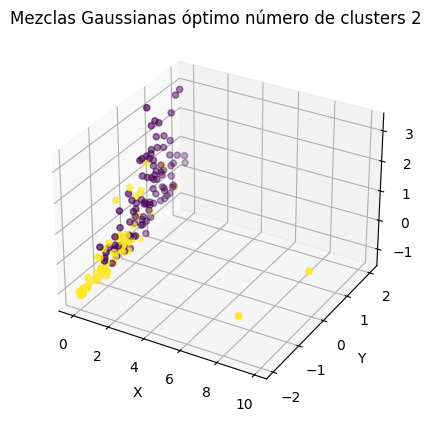

In [ ]:
# Crear el objeto GaussianMixture
gmm = GaussianMixture(n_components=2)

# Ajustar el modelo a los datos
gmm.fit(df_modelo)

# Obtener las etiquetas de los clusters asignados
labels = gmm.predict(df_modelo)

# Obtener las probabilidades de pertenencia a cada cluster
probs = gmm.predict_proba(df_modelo)

plot_data(df_modelo, labels, 'Mezclas Gaussianas óptimo número de clusters 2')

In [ ]:
merged_df["etiquetas"]= labels

print(labels)
promedio_por_grupo = merged_df.groupby('etiquetas')['Animal Products_x','Vegetal Products_x','Obesity_x','Alcoholic Beverages_y','Fruits - Excluding Wine_y','Confirmed_y', 'Deaths_y',
       'Recovered_y'].mean()

promedio_por_grupo

[1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1]


,Animal Products_x,Vegetal Products_x,Obesity_x,Alcoholic Beverages_y,Fruits - Excluding Wine_y,Confirmed_y,Deaths_y,Recovered_y
etiquetas,,,,,,,,
0,25.155934,24.844305,24.806452,0.295403,0.848673,3.310052,0.064584,2.348558
1,14.732030,35.268144,10.590000,0.231190,0.854756,0.339496,0.006432,0.282384


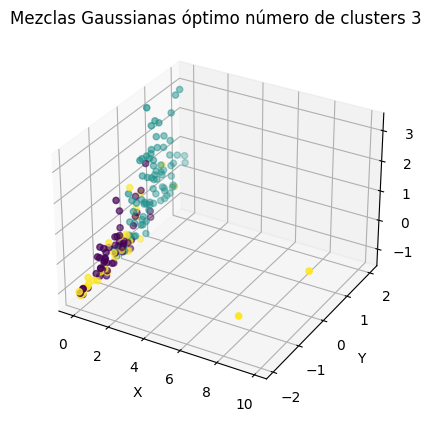

In [ ]:
# Crear el objeto GaussianMixture
gmm = GaussianMixture(n_components=3)

# Ajustar el modelo a los datos
gmm.fit(df_modelo)

# Obtener las etiquetas de los clusters asignados
labels = gmm.predict(df_modelo)

# Obtener las probabilidades de pertenencia a cada cluster
probs = gmm.predict_proba(df_modelo)

plot_data(df_modelo, labels, 'Mezclas Gaussianas óptimo número de clusters 3')

In [ ]:
merged_df["etiquetas"]= labels

print(labels)
promedio_por_grupo = merged_df.groupby('etiquetas')['Animal Products_x','Vegetal Products_x','Obesity_x','Alcoholic Beverages_y','Fruits - Excluding Wine_y','Confirmed_y', 'Deaths_y',
       'Recovered_y'].mean()

promedio_por_grupo

[0 1 0 2 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 0 1 1 2 0 2 2 1 2 2 1 1 1 2 1 2 1 0
 1 1 1 0 1 1 1 0 0 1 0 0 2 1 1 2 2 1 1 2 1 1 0 0 0 2 0 0 1 1 0 2 0 0 1 1 1
 2 2 0 1 0 2 1 1 2 1 0 0 0 1 1 0 2 2 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 2 1 1
 1 0 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 0 0 1 0 1 1 2 0 1 2 0 0 1 1 0 2 0 0 1 0
 0 2 1 0 1 2 1 1 0 2 0 2 0 2 0]


,Animal Products_x,Vegetal Products_x,Obesity_x,Alcoholic Beverages_y,Fruits - Excluding Wine_y,Confirmed_y,Deaths_y,Recovered_y
etiquetas,,,,,,,,
0,15.080529,34.919951,15.741176,0.111518,0.684865,0.829726,0.014975,0.708952
1,26.832027,23.168208,24.150000,0.332577,0.833419,3.612893,0.071419,2.511113
2,14.962909,35.036847,10.641176,0.353747,1.141903,0.219937,0.003594,0.181159


**¿Qué preguntas consideran importantes que pueden responder con agrupamiento para esa base de datos?¿Qué han descubierto al analizar los grupos?**

Al analizar el primer agrupamiento, cuando se utilizaron 10 clusters, observamos que se podía observar una pequeña diferencia entre los promedios de las variables Deaths, Recovered y Confirmed, (las cuales son las variables que más nos interesan en este modelo), realmente no son muy claras las diferencias entre cada una de las clases formadas.

Sin embargo, una vez que analizamos el número de cluster óptimos, el cual nos arrojó que eran alrededor de 2, hicimos los modelos con 2 y 3 clusters, en los cuales ya se nota una diferencia muy clara en el agrupamiento. En ambos se ve que entre mayor sea el índice de casos confirmados de COVID, mayor será las muertes y personas recuperadas, lo cual nos hace sentido.

Otro patrón que se observa es que entre mayor sea el índice de consumo de productos vegetales y menor el consumo de productos animales, el índice de casos confirmados es menores y en consecuencia el índice de muertes y personas recuperadas es menor. También el índice de obesidad juega un papel importante, ya que, entre menor sea este, menor es el índice de casos confirmados, muertes y recuperados.

Explorando a más detalles los datos, observamos que la mayoría de países que se categorizan en aquellas clases que tiene un menor índice en casos confirmados, muertes y recuperados, son aquellos que se encuentran en el continente Africano o Asiático, por ejemplo, Afghanistan, Angola, Bangldesh, Benín, Yemen, Zambia, etc.


# Spectral Clustering

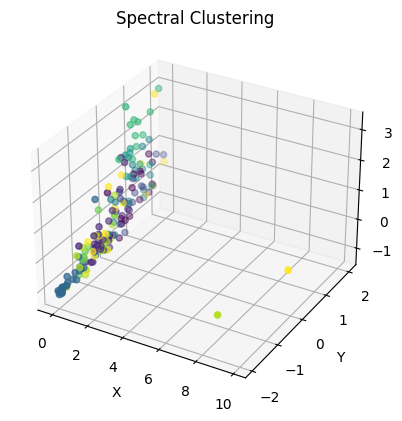

In [ ]:
# Aplicar Spectral Clustering
spectral = SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity='nearest_neighbors')
labels = spectral.fit_predict(df_modelo)
plot_data(df_modelo, labels, 'Spectral Clustering')

In [ ]:
merged_df["etiquetas"]= labels
print(labels)

promedio_por_grupo = merged_df.groupby('etiquetas')['Animal Products_x','Vegetal Products_x','Obesity_x','Alcoholic Beverages_y','Fruits - Excluding Wine_y','Confirmed_y', 'Deaths_y',
       'Recovered_y'].mean()

promedio_por_grupo

[8 0 1 9 2 4 0 9 6 0 2 3 2 9 6 1 3 4 0 1 4 4 3 1 8 3 6 9 9 4 9 4 9 4 3 5 1
 2 5 6 8 2 1 1 8 1 0 8 3 9 2 4 9 3 5 6 3 7 2 1 3 7 0 3 1 6 2 3 3 7 1 6 4 4
 2 1 7 0 8 9 0 0 8 6 7 8 8 4 5 8 9 1 2 8 0 1 1 1 9 5 1 3 1 8 4 9 1 3 3 0 2
 0 1 5 1 1 9 6 5 4 0 4 3 2 2 2 9 3 1 3 0 3 6 5 9 1 4 3 8 1 6 4 8 1 8 3 2 7
 7 3 0 7 4 3 4 1 0 9 1 9 8 8 8]


,Animal Products_x,Vegetal Products_x,Obesity_x,Alcoholic Beverages_y,Fruits - Excluding Wine_y,Confirmed_y,Deaths_y,Recovered_y
etiquetas,,,,,,,,
0,27.052325,22.948306,22.900000,0.253544,0.838475,3.091939,0.055812,2.383332
1,18.599704,31.400607,20.339286,0.189011,0.839111,1.202931,0.030501,1.044220
2,27.427440,22.573607,22.580000,0.195173,1.068747,1.065192,0.010189,0.661791
3,8.551061,41.447565,7.256522,0.269570,1.109800,0.185041,0.002788,0.158293
4,25.933861,24.065689,25.483333,0.309961,0.772583,4.954481,0.106621,2.723957
5,28.010625,21.988600,24.525000,0.498400,0.719263,8.043833,0.129844,7.205541
6,28.594645,21.405464,25.090909,0.577845,0.590073,4.133580,0.093653,2.395907
7,14.779925,35.220150,26.900000,0.077988,0.970638,2.415808,0.040243,1.979614
8,15.563422,34.437850,9.366667,0.160144,0.649728,0.269471,0.006689,0.215397


Número óptimo de clústers método Silhouette

La puntuación de silhouette para 2 clusters: 0.157
La puntuación de silhouette para 3 clusters: 0.122
La puntuación de silhouette para 4 clusters: 0.095
La puntuación de silhouette para 5 clusters: 0.054
La puntuación de silhouette para 6 clusters: 0.064
La puntuación de silhouette para 7 clusters: 0.067
La puntuación de silhouette para 8 clusters: 0.08
La puntuación de silhouette para 9 clusters: 0.082
La puntuación de silhouette para 10 clusters: 0.078


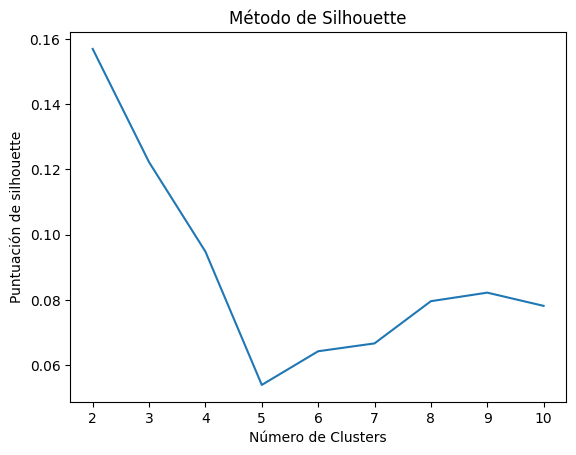

In [ ]:
silhouette_scores = []
for k in range(2, 11):
  sc = SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity='nearest_neighbors')
  sc.fit(df_modelo)
  labels = sc.labels_
  silhouette_avg = silhouette_score(df_modelo, labels)
  silhouette_scores.append(silhouette_avg)
  print("La puntuación de silhouette para", k, "clusters:", round(silhouette_avg, 3))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de silhouette')
plt.title('Método de Silhouette')
plt.show()

Analizando el método de Silhouette, el número óptimo de clústers en 2. Sin embargo, estaremos analizando con 2 y 3 clusters para poder analizar si se siguen los mismos patrones en ambos casos.

SPECTRAL CLUSTERING ÓPTIMO NÚMERO DE CLÚSTERS

cluster = 2

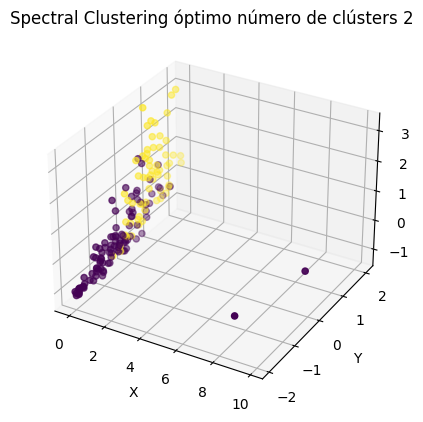

In [ ]:

spectral = SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity='nearest_neighbors')
labels = spectral.fit_predict(df_modelo)
plot_data(df_modelo, labels, 'Spectral Clustering óptimo número de clústers 2')

In [ ]:
merged_df["etiquetas"]= labels

print(labels)
promedio_por_grupo = merged_df.groupby('etiquetas')['Animal Products_x','Vegetal Products_x','Obesity_x','Alcoholic Beverages_y','Fruits - Excluding Wine_y','Confirmed_y', 'Deaths_y',
       'Recovered_y'].mean()

promedio_por_grupo

[0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1
 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0]


,Animal Products_x,Vegetal Products_x,Obesity_x,Alcoholic Beverages_y,Fruits - Excluding Wine_y,Confirmed_y,Deaths_y,Recovered_y
etiquetas,,,,,,,,
0,16.693525,33.306807,14.911881,0.203213,0.931430,0.684606,0.011796,0.546038
1,27.172548,22.827468,24.874194,0.373085,0.720727,4.233134,0.084922,2.952144


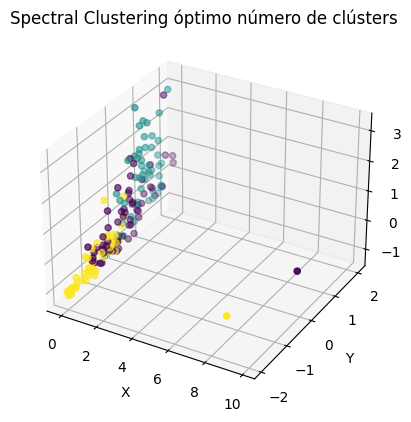

In [ ]:
spectral = SpectralClustering(n_clusters=3, eigen_solver='arpack', affinity='nearest_neighbors')
labels = spectral.fit_predict(df_modelo)
plot_data(df_modelo, labels, 'Spectral Clustering óptimo número de clústers')

In [ ]:
merged_df["etiquetas"]= labels

print(labels)
promedio_por_grupo = merged_df.groupby('etiquetas')['Animal Products_x','Vegetal Products_x','Obesity_x','Alcoholic Beverages_y','Fruits - Excluding Wine_y','Confirmed_y', 'Deaths_y',
       'Recovered_y'].mean()
promedio_por_grupo

[2 1 0 2 0 1 1 0 1 1 0 2 0 0 1 0 2 1 1 0 1 1 2 0 2 2 1 2 2 1 0 1 2 1 2 1 0
 0 1 1 2 0 0 0 2 0 1 2 2 0 0 1 0 2 1 1 2 0 0 0 2 2 0 2 0 1 0 2 2 0 0 1 1 1
 0 0 0 0 2 0 0 1 2 1 0 2 2 1 1 2 2 0 0 2 1 2 0 1 0 1 0 2 2 2 1 0 2 2 2 1 0
 0 0 1 0 0 0 1 1 1 1 1 2 0 0 0 0 2 0 2 1 2 1 1 2 0 1 2 2 0 1 1 2 0 2 2 0 0
 0 2 1 0 1 2 1 0 0 2 0 0 2 2 2]


,Animal Products_x,Vegetal Products_x,Obesity_x,Alcoholic Beverages_y,Fruits - Excluding Wine_y,Confirmed_y,Deaths_y,Recovered_y
etiquetas,,,,,,,,
0,22.151802,27.848669,22.120968,0.196768,0.936908,1.268896,0.021041,1.036493
1,27.477390,22.522618,24.693878,0.403655,0.713396,4.917335,0.100335,3.345717
2,12.518081,37.482013,8.976923,0.224560,0.879131,0.230357,0.004531,0.191924


**¿Qué preguntas consideran importantes que pueden responder con agrupamiento para esa base de datos?¿Qué han descubierto al analizar los grupos?**

Al momento de querer realizar los agrupamientos con 10 clusters no se pueden observar patrones o comportamientos para cada una de las clases que se generaron, ya que la diferencias entre el promedio de los índices de cada característica no es muy notable.

Sin embargo, una vez que analizamos el número de cluster óptimos, el cual nos arrojó que eran alrededor de 2, hicimos los modelos con 2 y 3 clusters, los cuales nos permitieron observar a detalle las diferencias entre cada clase. Hace sentido que en ambos se ve que entre mayor sea el índice de casos confirmados de COVID, mayor será las muertes y personas recuperadas.

Un patrón que se observa es que entre mayor sea el índice de consumo de productos vegetales y menor el consumo de productos animales, el índice de casos confirmados es menores y en consecuencia el índice de muertes y personas recuperadas es menor. También el índice de obesidad juega un papel importante, ya que, entre menor sea este, menor es el índice de casos confirmados, muertes y recuperados.

Explorando a más detalles los datos, observamos que la mayoría de los países que se categorizan en aquellas clases que tiene un menor índice en casos confirmados, muertes y recuperados, son aquellos que se encuentran en el continente Africano o Asiático, por ejemplo, Afghanistan, United Republic of Tanzania, Bangldesh, Zambia, Algeria, Benín, Yemen, etc.
